**ogs@jupyter-lab: radial heat diffusion**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [1]:
from ogs6py import ogs
#run ogs
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="full.prj", MKL=False)
#model.geo.addGeom(filename="square_1x1.gml")
model.mesh.addMesh(filename="quarterCircle_domain_ini.vtu")
model.mesh.addMesh(filename="quarterCircle_physical_group_Copper.vtu")
model.runModel(path="/home/ok/ogs/build/release/bin/",LOGFILE="example.log")

>>> run ogs <<<
OGS finished with project file full.prj.
Execution took 13.072800636291504 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
./result_CASE_1_.pvd
./result_CASE_1__ts_10_t_0.010000.vtu
./result_CASE_1__ts_19_t_0.100000.vtu
./result_CASE_1__ts_28_t_1.000000.vtu
./result_CASE_1__ts_37_t_10.000000.vtu
./result_CASE_1__ts_46_t_100.000000.vtu
./result_CASE_1__ts_55_t_1000.000000.vtu
./result_CASE_1__ts_64_t_10000.000000.vtu
./result_CASE_1__ts_73_t_100000.000000.vtu


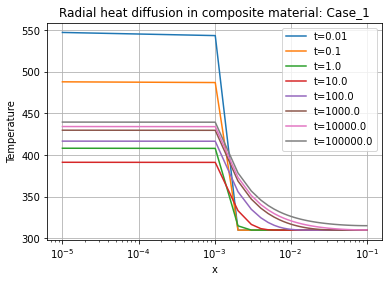

In [2]:
import vtuIO	# to read and process (point interpolation) vtu- and pvd-files 
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO(".", "result_CASE_1_.pvd", dim=2)
# define xaxis and diagonal (list)
xaxis =  [(i,0,0) for i in np.linspace(start=0.00001, stop=0.1, num=100)]
r_x = np.array(xaxis)[:,0]
##diagonal = [(i,i,0) for i in np.linspace(start=0.0, stop=0.01, num=100)]
##r_diag = np.sqrt(np.array(diagonal)[:,0]**2+np.array(diagonal)[:,1]**2)
# define timestep
time = [0.01,0.1,1.,10.,100.,1000.,10000.,100000.]
t1 = 0.01
t2 = 0.1
t3 = 1.0
t4 = 10.
t5 = 100.
t6 = 1000.
t7 = 10000.
t8 = 100000.
# read and interpolate from vtu-files listed in pvd
for t in time:
    pressure_xaxis_t = pvdfile.readPointSetData(t, 'temperature', pointsetarray=xaxis)
    plt.plot(r_x, pressure_xaxis_t, label='t='+str(t))
# plot formatting
titlestring="Radial heat diffusion in composite material: Case_1"
plt.title(titlestring)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.savefig("case_1.png")
plt.show()

**Results have been shown using [matplotlib](https://matplotlib.org/)**